Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
tensor([[1., 3.],
        [2., 6.],
        [3., 9.]])
tensor([[ 1.],
        [ 5.],
        [13.]])
Epoch 0 - loss: 150.3333282470703
Epoch 1 - loss: 6.120000839233398
Epoch 2 - loss: 36.42483139038086
Epoch 3 - loss: 18.104551315307617
Epoch 4 - loss: 6.065778732299805
Epoch 5 - loss: 10.368834495544434
Epoch 6 - loss: 6.2322306632995605
Epoch 7 - loss: 5.852260589599609
Epoch 8 - loss: 6.088119983673096
Epoch 9 - loss: 5.494863986968994
Epoch 10 - loss: 5.574592590332031
Epoch 11 - loss: 5.536750793457031
Epoch 12 - loss: 5.476493835449219
Epoch 13 - loss: 5.4938530921936035
Epoch 14 - loss: 5.480627059936523
Epoch 15 - loss: 5.477013111114502
Epoch 16 - loss: 5.478647232055664
Epoch 17 - loss: 5.476378917694092
Epoch 18 - loss: 5.4764790534973145
Epoch 19 - loss: 5.476463794708252
Epoch 20 - loss: 5.47619104385376
Epoch 21 - loss: 5.476250171661377
Epoc

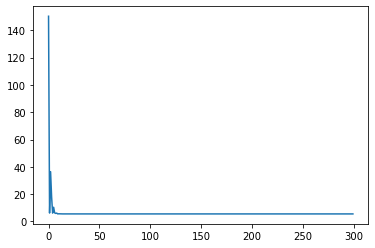

In [19]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

print(data)
print(target)

hist = []

############## Batch GD based update ##############       
      
for epoch in range(300):   
    optimizer.zero_grad()
    outputs = net(data)
    loss = criterion(outputs, target)
    loss.backward()
    hist.append(loss.detach())
    optimizer.step()
    print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")

Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
tensor([[1., 3.],
        [2., 6.],
        [3., 9.]])
tensor([[ 1.],
        [ 5.],
        [13.]])
Epoch 0 - loss: 92.67108917236328
Epoch 1 - loss: 22.294326782226562
Epoch 2 - loss: 74.68377685546875
Epoch 3 - loss: 21.069318771362305
Epoch 4 - loss: 73.96097564697266
Epoch 5 - loss: 20.83412742614746
Epoch 6 - loss: 73.49624633789062
Epoch 7 - loss: 20.61663246154785
Epoch 8 - loss: 73.03913116455078
Epoch 9 - loss: 20.40189552307129
Epoch 10 - loss: 72.58573150634766
Epoch 11 - loss: 20.189680099487305
Epoch 12 - loss: 72.13591766357422
Epoch 13 - loss: 19.979936599731445
Epoch 14 - loss: 71.68966674804688
Epoch 15 - loss: 19.772661209106445
Epoch 16 - loss: 71.24691772460938
Epoch 17 - loss: 19.567800521850586
Epoch 18 - loss: 70.80769348144531
Epoch 19 - loss: 19.36534309387207
Epoch 20 - loss: 70.37194061279297
Epoch 21 - loss: 19.16526985168457
Ep

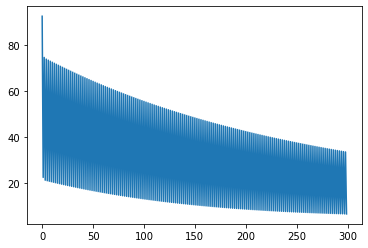

In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

print(data)
print(target)

hist = []

############## SGD based update ##############       
      
for epoch in range(300):   
    for d, t in zip(data, target):
        optimizer.zero_grad()
        outputs = net(d)
        loss = criterion(outputs, t)
        loss.backward()
        optimizer.step()
    outputs = net(data)
    loss = criterion(outputs, target)
    hist.append(loss.detach())
    print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")